# IMPORTING LIBRARIES

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from scipy import stats

# LOADING DATA

In [2]:
data=[]

In [3]:
dir="C:/Users/David Nereekshan/ML assignment/data/a01/p1"
for root, subdirectories, files in os.walk(dir):
    for file in files:
        path=os.path.join(root, file)
        with open(path) as info:
            data.append(info.read())

# DATA CLEANING

In [4]:
data[10]
len(data)

60

In [5]:
df = pd.DataFrame(data)
df

,0
0,"8.1305,1.0349,5.4217,-0.009461,0.001915,-0.003..."
1,"7.9665,1.1684,5.6755,-0.00573,0.026995,-0.0090..."
2,"7.8917,1.139,5.698,0.01418,0.028722,-0.009079,..."
3,"7.9366,1.1536,5.6318,0.003242,0.029965,0.00911..."
4,"7.8913,1.1972,5.9082,-0.044333,-0.067467,-0.00..."
5,"8.0411,1.153,5.5141,-0.0241,-0.002951,0.007333..."
6,"7.9589,1.1825,5.634,-0.010257,0.048934,-0.0011..."
7,"7.8991,1.1681,5.6633,-0.000474,0.012995,-0.001..."
8,"8.0483,1.1523,5.5309,-0.000444,0.020229,-0.003..."
9,"7.9215,1.2045,5.68,0.01146,0.044284,-0.013043,..."


In [6]:
df.columns=['aa']

In [7]:
df=df.drop('aa', axis=1).join(df['aa'].str.split("\n", expand=True).stack().reset_index(level=1, drop=True).rename('aa'))
df

,aa
0,"8.1305,1.0349,5.4217,-0.009461,0.001915,-0.003..."
0,"8.1305,1.0202,5.3843,-0.009368,0.023485,0.0019..."
0,"8.1604,1.0201,5.3622,0.015046,0.01433,0.000204..."
0,"8.1603,1.0052,5.377,0.006892,0.018045,0.005649..."
0,"8.1605,1.0275,5.3473,0.008811,0.030433,-0.0053..."
...,...
59,"7.8324,1.6232,5.6674,0.002754,0.023532,-0.0012..."
59,"7.8473,1.6378,5.6825,0.010872,0.019026,0.00063..."
59,"7.8548,1.6379,5.6527,0.000977,0.034372,0.0042,..."
59,"7.8472,1.623,5.6974,0.011844,0.035202,0.004212..."


In [8]:
df=df['aa'].str.split(',', expand=True)
df

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,8.1305,1.0349,5.4217,-0.009461,0.001915,-0.003424,-0.78712,-0.069654,0.1573,0.70097,...,-0.036453,-2.8071,-9.0812,2.622,-0.000232,-0.012092,-0.004457,0.74017,0.30053,-0.05773
0,8.1305,1.0202,5.3843,-0.009368,0.023485,0.001953,-0.78717,-0.068275,0.1589,0.71829,...,-0.034005,-2.8146,-9.0737,2.6218,-0.014784,-0.016477,0.002789,0.73937,0.30183,-0.057514
0,8.1604,1.0201,5.3622,0.015046,0.01433,0.000204,-0.78664,-0.068277,0.15879,0.69849,...,-0.036489,-2.8221,-9.0886,2.6366,-0.01277,0.005717,-0.007918,0.73955,0.30052,-0.057219
0,8.1603,1.0052,5.377,0.006892,0.018045,0.005649,-0.78529,-0.069849,0.15912,0.72799,...,-0.036151,-2.8071,-9.0811,2.607,-0.005725,0.00962,0.006555,0.74029,0.30184,-0.05775
0,8.1605,1.0275,5.3473,0.008811,0.030433,-0.005346,-0.78742,-0.068796,0.15916,0.71572,...,-0.033807,-2.8146,-9.0737,2.6218,-0.003929,-0.008371,0.002816,0.73845,0.3009,-0.057527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,7.8324,1.6232,5.6674,0.002754,0.023532,-0.001225,-0.78812,-0.087471,0.12978,0.005096,...,-0.04381,-2.7664,-9.077,2.5927,-0.005807,-0.009519,-0.003295,0.73758,0.30551,-0.052294
59,7.8473,1.6378,5.6825,0.010872,0.019026,0.000632,-0.78893,-0.087006,0.12731,-0.004781,...,-0.043232,-2.7814,-9.0919,2.6073,-0.002184,0.008478,-0.000463,0.73706,0.30524,-0.052172
59,7.8548,1.6379,5.6527,0.000977,0.034372,0.0042,-0.7882,-0.086781,0.12842,0.010015,...,-0.045016,-2.7739,-9.0919,2.6074,-0.002089,-0.000671,-0.009573,0.73759,0.30445,-0.052408
59,7.8472,1.623,5.6974,0.011844,0.035202,0.004212,-0.78962,-0.088036,0.12701,0.005041,...,-0.044177,-2.7814,-9.1143,2.5923,-0.016762,-0.010267,0.00578,0.73804,0.30526,-0.053348


In [9]:
df.columns=['T_xacc', 'T_yacc', 'T_zacc', 'T_xgyro', 'T_ygyro', 'T_zgyro', 'T_xmag', 'T_ymag', 'T_zmag',
            'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag',
            'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag',
            'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag',
            'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag']

In [10]:
df=df.dropna() 

In [11]:
df

,T_xacc,T_yacc,T_zacc,T_xgyro,T_ygyro,T_zgyro,T_xmag,T_ymag,T_zmag,RA_xacc,...,RL_zmag,LL_xacc,LL_yacc,LL_zacc,LL_xgyro,LL_ygyro,LL_zgyro,LL_xmag,LL_ymag,LL_zmag
0,8.1305,1.0349,5.4217,-0.009461,0.001915,-0.003424,-0.78712,-0.069654,0.1573,0.70097,...,-0.036453,-2.8071,-9.0812,2.622,-0.000232,-0.012092,-0.004457,0.74017,0.30053,-0.05773
0,8.1305,1.0202,5.3843,-0.009368,0.023485,0.001953,-0.78717,-0.068275,0.1589,0.71829,...,-0.034005,-2.8146,-9.0737,2.6218,-0.014784,-0.016477,0.002789,0.73937,0.30183,-0.057514
0,8.1604,1.0201,5.3622,0.015046,0.01433,0.000204,-0.78664,-0.068277,0.15879,0.69849,...,-0.036489,-2.8221,-9.0886,2.6366,-0.01277,0.005717,-0.007918,0.73955,0.30052,-0.057219
0,8.1603,1.0052,5.377,0.006892,0.018045,0.005649,-0.78529,-0.069849,0.15912,0.72799,...,-0.036151,-2.8071,-9.0811,2.607,-0.005725,0.00962,0.006555,0.74029,0.30184,-0.05775
0,8.1605,1.0275,5.3473,0.008811,0.030433,-0.005346,-0.78742,-0.068796,0.15916,0.71572,...,-0.033807,-2.8146,-9.0737,2.6218,-0.003929,-0.008371,0.002816,0.73845,0.3009,-0.057527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,7.8472,1.6377,5.7124,-0.006153,0.043142,-0.015909,-0.7878,-0.086782,0.12829,0.005076,...,-0.043549,-2.7815,-9.1217,2.5923,-0.005807,0.006692,0.00044,0.73578,0.30603,-0.052899
59,7.8324,1.6232,5.6674,0.002754,0.023532,-0.001225,-0.78812,-0.087471,0.12978,0.005096,...,-0.04381,-2.7664,-9.077,2.5927,-0.005807,-0.009519,-0.003295,0.73758,0.30551,-0.052294
59,7.8473,1.6378,5.6825,0.010872,0.019026,0.000632,-0.78893,-0.087006,0.12731,-0.004781,...,-0.043232,-2.7814,-9.0919,2.6073,-0.002184,0.008478,-0.000463,0.73706,0.30524,-0.052172
59,7.8548,1.6379,5.6527,0.000977,0.034372,0.0042,-0.7882,-0.086781,0.12842,0.010015,...,-0.045016,-2.7739,-9.0919,2.6074,-0.002089,-0.000671,-0.009573,0.73759,0.30445,-0.052408


In [12]:
df.describe(include='all')

,T_xacc,T_yacc,T_zacc,T_xgyro,T_ygyro,T_zgyro,T_xmag,T_ymag,T_zmag,RA_xacc,...,RL_zmag,LL_xacc,LL_yacc,LL_zacc,LL_xgyro,LL_ygyro,LL_zgyro,LL_xmag,LL_ymag,LL_zmag
count,7500,7500,7500,7500,7500,7500,7500,7500,7500,7500,...,7500,7500,7500,7500,7500,7500,7500,7500,7500,7500
unique,689,1432,3319,6447,7119,6378,934,5232,3069,6469,...,4271,628,550,964,6474,6406,6099,770,690,3340
top,7.8318,1.3144,5.7505,0.00114,0.016457,-0.002847,-0.79185,-0.077659,0.12045,0.10434,...,-0.039692,-2.7771,-9.0839,2.634,-0.000822,-0.004423,-0.003284,0.73982,0.30245,-0.057252
freq,124,39,13,5,3,5,27,6,11,5,...,7,94,85,41,4,5,5,32,40,10


In [13]:
dataTypeSeries = df.dtypes
print('Data type of each column of Dataframe :')
print(dataTypeSeries)

Data type of each column of Dataframe :
T_xacc      object
T_yacc      object
T_zacc      object
T_xgyro     object
T_ygyro     object
T_zgyro     object
T_xmag      object
T_ymag      object
T_zmag      object
RA_xacc     object
RA_yacc     object
RA_zacc     object
RA_xgyro    object
RA_ygyro    object
RA_zgyro    object
RA_xmag     object
RA_ymag     object
RA_zmag     object
LA_xacc     object
LA_yacc     object
LA_zacc     object
LA_xgyro    object
LA_ygyro    object
LA_zgyro    object
LA_xmag     object
LA_ymag     object
LA_zmag     object
RL_xacc     object
RL_yacc     object
RL_zacc     object
RL_xgyro    object
RL_ygyro    object
RL_zgyro    object
RL_xmag     object
RL_ymag     object
RL_zmag     object
LL_xacc     object
LL_yacc     object
LL_zacc     object
LL_xgyro    object
LL_ygyro    object
LL_zgyro    object
LL_xmag     object
LL_ymag     object
LL_zmag     object
dtype: object


In [14]:
df = df.astype(dict.fromkeys(df.columns[0:44], float))

<AxesSubplot:>

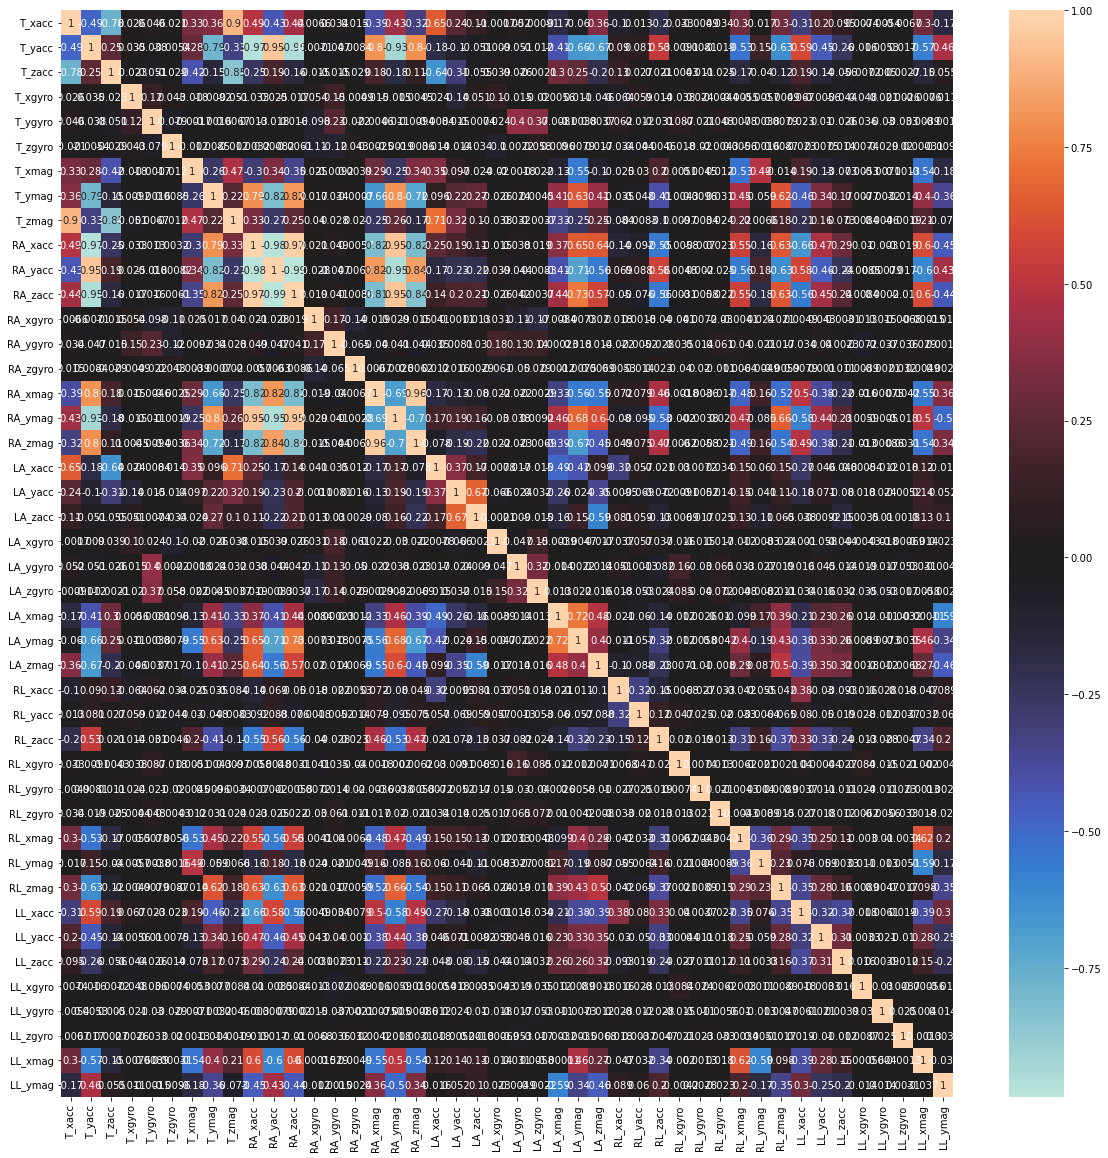

In [15]:
corrmat= df.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, center=0)

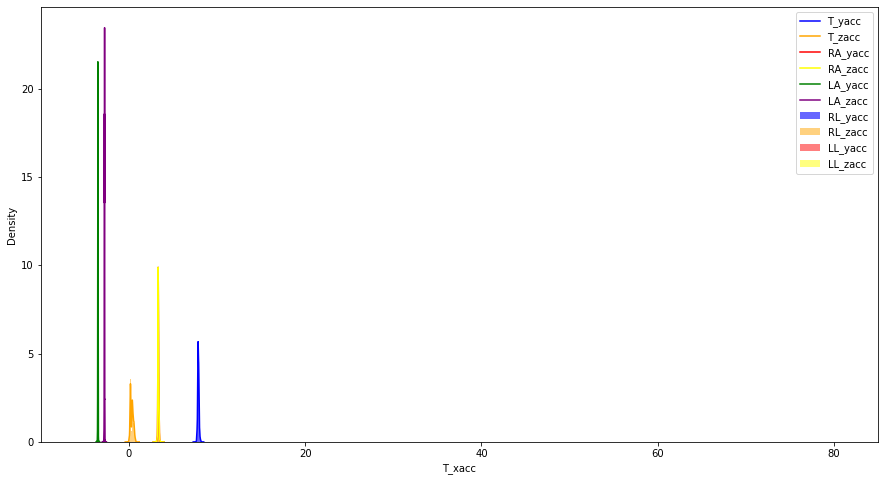

In [16]:
plt.figure(figsize=(15,8))
ax = df["T_xacc"].hist(bins=15, density=True, stacked=True, color='blue', alpha=0.6)
df["T_xacc"].plot(kind='density', color='Blue')
ax = df["RA_xacc"].hist(bins=15, density=True, stacked=True, color='orange', alpha=0.5)
df["RA_xacc"].plot(kind='density', color='orange')
ax = df["LA_xacc"].hist(bins=15, density=True, stacked=True, color='red', alpha=0.5)
df["LA_xacc"].plot(kind='density', color='red')
ax = df["LA_xacc"].hist(bins=15, density=True, stacked=True, color='yellow', alpha=0.5)
df["LA_xacc"].plot(kind='density', color='yellow')
ax = df["RL_xacc"].hist(bins=15, density=True, stacked=True, color='green', alpha=0.5)
df["RL_xacc"].plot(kind='density', color='green')
ax = df["LL_xacc"].hist(bins=15, density=True, stacked=True, color='purple', alpha=0.5)
df["LL_xacc"].plot(kind='density', color='purple')
ax.legend(['T_yacc', 'T_zacc', 'RA_yacc', 'RA_zacc', 'LA_yacc', 'LA_zacc', 'RL_yacc', 'RL_zacc', 'LL_yacc', 'LL_zacc'])
ax.set(xlabel='T_xacc')
plt.xlim(-10,85)
plt.show()


# DATA PREPROCESSING

In [17]:
f = (df.dtypes == 'float')
object_cols = list(f[f].index)
print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['T_xacc', 'T_yacc', 'T_zacc', 'T_xgyro', 'T_ygyro', 'T_zgyro', 'T_xmag', 'T_ymag', 'T_zmag', 'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 'RA_ymag', 'RA_zmag', 'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag']


In [18]:
LE=LabelEncoder()
for i in object_cols:
    df[i]=df[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


In [19]:
#Scaling
scaler = StandardScaler()
scaler.fit(df)
scaled_df = pd.DataFrame(scaler.transform(df),columns= df.columns )
print("All features are now scaled")

All features are now scaled


In [20]:
print("Dataframe to be used for further modelling:")
scaled_df.head()

Dataframe to be used for further modelling:


,T_xacc,T_yacc,T_zacc,T_xgyro,T_ygyro,T_zgyro,T_xmag,T_ymag,T_zmag,RA_xacc,...,RL_zmag,LL_xacc,LL_yacc,LL_zacc,LL_xgyro,LL_ygyro,LL_zgyro,LL_xmag,LL_ymag,LL_zmag
0,2.681829,-2.040482,-2.023416,-1.137787,-1.128660,-0.062368,2.499798,1.827071,2.124834,1.746683,...,1.807501,-0.876761,0.803642,-0.154708,0.951592,-1.686810,-0.299217,0.771364,-1.727930,-0.950523
1,2.681829,-2.065049,-2.072608,-1.132244,0.225902,0.884599,2.477855,1.884601,2.137188,1.767780,...,1.944254,-1.278873,1.363370,-0.165723,-1.391703,-1.765403,1.005818,0.264376,-0.737582,-0.740537
2,2.757851,-2.067778,-2.092285,1.149031,-0.490930,0.628525,2.609509,1.883891,2.135815,1.745060,...,1.803855,-1.640773,0.234427,0.649336,-1.208944,0.684331,-0.876682,0.378449,-1.735548,-0.453750
3,2.750249,-2.075967,-2.079987,0.471743,-0.207931,1.312695,2.763106,1.812155,2.144051,1.773731,...,1.834852,-0.876761,0.813129,-0.975274,-0.076499,1.254542,1.433765,0.847412,-0.729964,-0.969966
4,2.765453,-2.051401,-2.098434,0.695104,0.702971,-0.374475,2.412028,1.869686,2.145424,1.765616,...,1.946078,-1.278873,1.363370,-0.165723,0.261413,-1.527397,1.006406,-0.318659,-1.446062,-0.753175


# DIMENSIONALITY REDUCTION

In [21]:
pca = PCA(n_components=3)
pca.fit(scaled_df)
PCA_df = pd.DataFrame(pca.transform(scaled_df), columns=(["col1","col2", "col3"]))
PCA_df.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,7500.0,7.645558e-15,3.349763,-7.213224,-2.837328,-0.155971,2.934606,7.618088
col2,7500.0,-8.506381e-16,2.051075,-5.333502,-1.394514,-0.069399,1.380171,6.143073
col3,7500.0,-1.191935e-16,1.731535,-4.662117,-1.338721,-0.105431,1.305793,5.166614


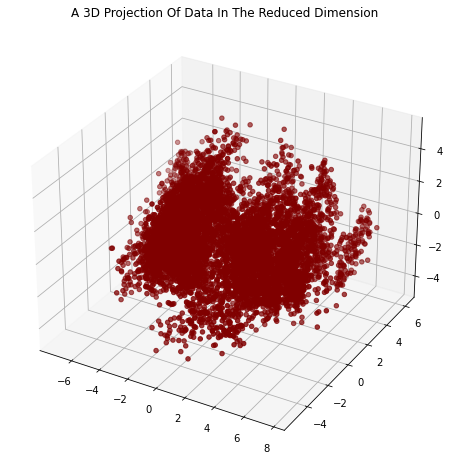

In [22]:
x =PCA_df["col1"]
y =PCA_df["col2"]
z =PCA_df["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

# CLASSIFICATION

In [23]:
df

,T_xacc,T_yacc,T_zacc,T_xgyro,T_ygyro,T_zgyro,T_xmag,T_ymag,T_zmag,RA_xacc,...,RL_zmag,LL_xacc,LL_yacc,LL_zacc,LL_xgyro,LL_ygyro,LL_zgyro,LL_xmag,LL_ymag,LL_zmag
0,674,15,83,1158,1265,3090,884,5100,3053,6410,...,4116,236,359,450,4961,170,2490,511,101,-0.05773
0,674,6,43,1168,4022,4780,880,5181,3062,6449,...,4266,186,418,448,717,29,4707,431,231,-0.057514
0,684,5,27,5284,2563,4323,904,5180,3061,6407,...,4112,141,299,596,1048,4424,1509,449,100,-0.057219
0,683,2,37,4062,3139,5544,932,5079,3067,6460,...,4146,236,360,301,3099,5447,5434,523,232,-0.05775
0,685,11,22,4465,4993,2533,868,5160,3068,6445,...,4268,186,418,448,3711,456,4708,339,138,-0.057527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,300,1417,1734,1624,6227,332,838,53,1806,42,...,169,401,54,167,3064,4797,4246,76,639,-0.052899
59,268,1407,1325,3186,4032,3817,813,19,1944,43,...,127,490,391,171,3064,353,3067,252,596,-0.052294
59,301,1418,1459,4719,3257,4372,738,38,1715,15,...,232,402,273,304,4312,5241,3911,200,572,-0.052172
59,315,1419,1193,2876,5505,5107,805,54,1819,50,...,18,449,273,305,4347,2409,1126,253,493,-0.052408


In [24]:
X = df.drop('T_xacc',axis=1)
y = df['T_xacc']

In [25]:
vector = CountVectorizer(max_features=10000,lowercase=False)
vector.fit(X,y)
trainX, testX,trainY,testY = train_test_split(X, y, test_size=20, random_state=20)

In [26]:
model = LogisticRegression(C = 10, n_jobs=-1)
rfe = model.fit(trainX, trainY)

In [27]:
model.score(testX, testY)
predicted_y = model.predict(testX)
confusion_matrix(testY,predicted_y)

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [28]:
print(classification_report(testY, predicted_y))

              precision    recall  f1-score   support

          14       0.00      0.00      0.00       1.0
          24       0.00      0.00      0.00       1.0
          41       0.00      0.00      0.00       0.0
          63       0.00      0.00      0.00       0.0
          83       0.00      0.00      0.00       0.0
         138       0.00      0.00      0.00       0.0
         153       0.00      0.00      0.00       0.0
         154       0.00      0.00      0.00       1.0
         180       0.00      0.00      0.00       0.0
         206       0.00      0.00      0.00       0.0
         222       0.00      0.00      0.00       1.0
         233       0.00      0.00      0.00       0.0
         235       0.00      0.00      0.00       1.0
         236       0.00      0.00      0.00       1.0
         260       0.00      0.00      0.00       1.0
         261       0.00      0.00      0.00       0.0
         290       0.00      0.00      0.00       1.0
         293       0.00    

D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Rec

In [29]:
logreg = LogisticRegression(C = 10, n_jobs=-1)
logreg.fit(trainX, trainY)
y_pred = logreg.predict(testX)
y_pred_proba = logreg.predict_proba(testX)[:, 1]


In [30]:
acc_log = round(logreg.score(trainX, trainY) * 100, 2)
acc_log

16.2

In [31]:
coeff_df = pd.DataFrame(trainX.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
11,RA_ygyro,0.000870
39,LL_zgyro,0.000820
20,LA_ygyro,0.000722
1,T_xgyro,0.000592
19,LA_xgyro,0.000520
28,RL_xgyro,0.000459
18,LA_zacc,0.000368
24,LA_zmag,0.000302
10,RA_xgyro,0.000214
23,LA_ymag,0.000201


In [32]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(trainX, trainY)
Y_pred = knn.predict(testX)
acc_knn = round(knn.score(trainX, trainY) * 100, 2)
acc_knn

31.08

In [33]:
print(classification_report(testY, Y_pred))

              precision    recall  f1-score   support

          14       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         1
          65       0.00      0.00      0.00         0
         122       0.00      0.00      0.00         0
         131       0.00      0.00      0.00         0
         151       0.00      0.00      0.00         0
         153       0.00      0.00      0.00         0
         154       1.00      1.00      1.00         1
         181       0.00      0.00      0.00         0
         210       0.00      0.00      0.00         0
         222       0.00      0.00      0.00         1
         235       0.00      0.00      0.00         1
         236       0.00      0.00      0.00         1
         238       0.00      0.00      0.00         0
         259       0.00      0.00      0.00         0
         260       0.00      0.00      0.00         1
         261       0.00      0.00      0.00         0
         264       0.00    

D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Rec

In [34]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(trainX, trainY)
Y_pred = decision_tree.predict(testX)
acc_decision_tree = round(decision_tree.score(trainX, trainY) * 100, 2)
acc_decision_tree

100.0

In [35]:
print(classification_report(testY, Y_pred))

              precision    recall  f1-score   support

          14       0.00      0.00      0.00       1.0
          24       0.00      0.00      0.00       1.0
          32       0.00      0.00      0.00       0.0
          66       0.00      0.00      0.00       0.0
         154       0.00      0.00      0.00       1.0
         179       0.00      0.00      0.00       0.0
         221       0.00      0.00      0.00       0.0
         222       0.00      0.00      0.00       1.0
         224       0.00      0.00      0.00       0.0
         233       0.00      0.00      0.00       0.0
         235       0.00      0.00      0.00       1.0
         236       0.00      0.00      0.00       1.0
         259       0.00      0.00      0.00       0.0
         260       0.00      0.00      0.00       1.0
         278       0.00      0.00      0.00       0.0
         290       0.00      0.00      0.00       1.0
         322       0.00      0.00      0.00       1.0
         324       0.00    

D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Rec

In [36]:
gaussian = GaussianNB()
gaussian.fit(trainX, trainY)
Y_pred = gaussian.predict(testX)
acc_gaussian = round(gaussian.score(trainX, trainY) * 100, 2)
acc_gaussian

20.29

In [37]:
print(classification_report(testY, Y_pred))

              precision    recall  f1-score   support

          14       0.00      0.00      0.00       1.0
          23       0.00      0.00      0.00       0.0
          24       0.00      0.00      0.00       1.0
         124       0.00      0.00      0.00       0.0
         138       0.00      0.00      0.00       0.0
         154       0.00      0.00      0.00       1.0
         182       0.00      0.00      0.00       0.0
         206       0.00      0.00      0.00       0.0
         207       0.00      0.00      0.00       0.0
         220       0.00      0.00      0.00       0.0
         222       0.00      0.00      0.00       1.0
         224       0.00      0.00      0.00       0.0
         235       0.00      0.00      0.00       1.0
         236       0.00      0.00      0.00       1.0
         239       0.00      0.00      0.00       0.0
         260       0.00      0.00      0.00       1.0
         290       0.00      0.00      0.00       1.0
         291       0.00    

D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Rec

# Model evaluation

In [38]:
models = pd.DataFrame({
    'Model': [ 'KNN', 'Logistic Regression', 
               'Naive Bayes', 'Decision Tree'],
    'Score': [ acc_knn, acc_log, acc_gaussian, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Decision Tree,100.00
0,KNN,31.08
2,Naive Bayes,20.29
1,Logistic Regression,16.20
